## Analisando Dados da Olist

Para esta análise vamos utilizar as bases Sellers, Order Payments, Order Items e Products.

### Coleta e limpeza de dados

In [1]:
import pandas as pd

In [2]:
df_vendedores = pd.read_csv('../../../material/dados/olist_sellers_dataset.csv')
df_vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [3]:
# Limpando colunas que não utilizaremos para esta análise
df_vendedores = df_vendedores.drop('seller_zip_code_prefix', axis=1)
df_vendedores

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS


In [4]:
df_vendedores.describe(include='all')

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,9e25199f6ef7e7c347120ff175652c3b,sao paulo,SP
freq,1,694,1849


In [5]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_city   3095 non-null   object
 2   seller_state  3095 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


In [6]:
df_pagamentos = pd.read_csv('../../../material/dados/olist_order_payments_dataset.csv')
df_pagamentos

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [7]:
# Limpando colunas que não utilizaremos para esta análise
columns_drop_pag = ['payment_sequential', 'payment_installments']
df_pagamentos = df_pagamentos.drop(columns=columns_drop_pag)

In [8]:
df_pagamentos.describe(include='all')

,order_id,payment_type,payment_value
count,103886,103886,103886.000000
unique,99440,5,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card,NaN
freq,29,76795,NaN
mean,NaN,NaN,154.100380
std,NaN,NaN,217.494064
min,NaN,NaN,0.000000
25%,NaN,NaN,56.790000
50%,NaN,NaN,100.000000
75%,NaN,NaN,171.837500


In [9]:
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_type   103886 non-null  object 
 2   payment_value  103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [10]:
df_itens = pd.read_csv('../../../material/dados/olist_order_items_dataset.csv')
df_itens

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [11]:
# Limpando colunas que não utilizaremos para esta análise
columns_drop_itens = ['shipping_limit_date', 'freight_value']
df_itens = df_itens.drop(columns=columns_drop_itens)

In [12]:
df_itens.describe(include='all')

,order_id,order_item_id,product_id,seller_id,price
count,112650,112650.000000,112650,112650,112650.000000
unique,98666,NaN,32951,3095,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN
freq,21,NaN,527,2033,NaN
mean,NaN,1.197834,NaN,NaN,120.653739
std,NaN,0.705124,NaN,NaN,183.633928
min,NaN,1.000000,NaN,NaN,0.850000
25%,NaN,1.000000,NaN,NaN,39.900000
50%,NaN,1.000000,NaN,NaN,74.990000
75%,NaN,1.000000,NaN,NaN,134.900000


In [13]:
df_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


In [14]:
df_produtos = pd.read_csv('../../../material/dados/olist_products_dataset.csv')
df_produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [15]:
# Limpando colunas que não utilizaremos para esta análise
columns_drop_produtos = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm']
df_produtos = df_produtos.drop(columns=columns_drop_produtos)

In [16]:
df_produtos.describe(include='all')

,product_id,product_category_name,product_weight_g
count,32951,32341,32949.000000
unique,32951,73,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN
freq,1,3029,NaN
mean,NaN,NaN,2276.472488
std,NaN,NaN,4282.038731
min,NaN,NaN,0.000000
25%,NaN,NaN,300.000000
50%,NaN,NaN,700.000000
75%,NaN,NaN,1900.000000


In [17]:
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


### Juntando os Datasets

In [18]:
df_olist = pd.merge(df_itens, df_vendedores, on="seller_id", how="inner")
df_olist.head()

,order_id,order_item_id,product_id,seller_id,price,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,loanda,PR


In [19]:
df_olist = pd.merge(df_olist, df_pagamentos, on="order_id", how="inner")
df_olist.head()

,order_id,order_item_id,product_id,seller_id,price,seller_city,seller_state,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,volta redonda,SP,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,sao paulo,SP,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,borda da mata,MG,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,franca,SP,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,loanda,PR,credit_card,218.04


In [20]:
df_olist = pd.merge(df_olist, df_produtos, on="product_id", how="inner")
df_olist.head()

,order_id,order_item_id,product_id,seller_id,price,seller_city,seller_state,payment_type,payment_value,product_category_name,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,volta redonda,SP,credit_card,72.19,cool_stuff,650.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,sao paulo,SP,credit_card,259.83,pet_shop,30000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,borda da mata,MG,credit_card,216.87,moveis_decoracao,3050.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,franca,SP,credit_card,25.78,perfumaria,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,loanda,PR,credit_card,218.04,ferramentas_jardim,3750.0


In [21]:
# Exportando a base final
df_olist.to_csv('olist_analise_condensada.csv', index=False)

## Analisando os Dados

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<blockquote>1. Quais são os vendedores com maior volume de vendas e como isso se relaciona com o valor total das vendas e o número de itens vendidos?</blockquote>

In [23]:
vendas_vendedor = df_olist.groupby('seller_id').agg({'order_id': 'count', 'price': 'sum'}).reset_index()
vendas_vendedor.columns = ['seller_id', 'quantidade_itens', 'valor_total_vendas']
top_vendedores = vendas_vendedor.sort_values('quantidade_itens', ascending=False)

In [24]:
top_vendedores.head(10)

,seller_id,quantidade_itens,valor_total_vendas
881,4a3ca9315b744ce9f8e9374361493884,2133,213299.57
1235,6560211a19b47992c3666cc44a7e94c0,2122,128489.82
368,1f50f920176fa81dab994f9023523100,2008,111435.81
2481,cc419e0650a3c5ba77189a1882b7556a,1847,108439.73
2643,da8622b14eb17ae2831f4ac5b9dab84a,1639,169297.77
1824,955fee9216a65b617aa5c0531780ce60,1528,137335.00
192,1025f0e2d44d7041d6cf58b6550e0bfa,1462,142130.94
1535,7c67e1448b00f6e969d365cea6b010ab,1452,198194.33
1505,7a67c85e85bb2ce8582c35f2203ad736,1240,149939.84
2836,ea8482cd71df3c1969d7b9473ff13abc,1239,38227.88


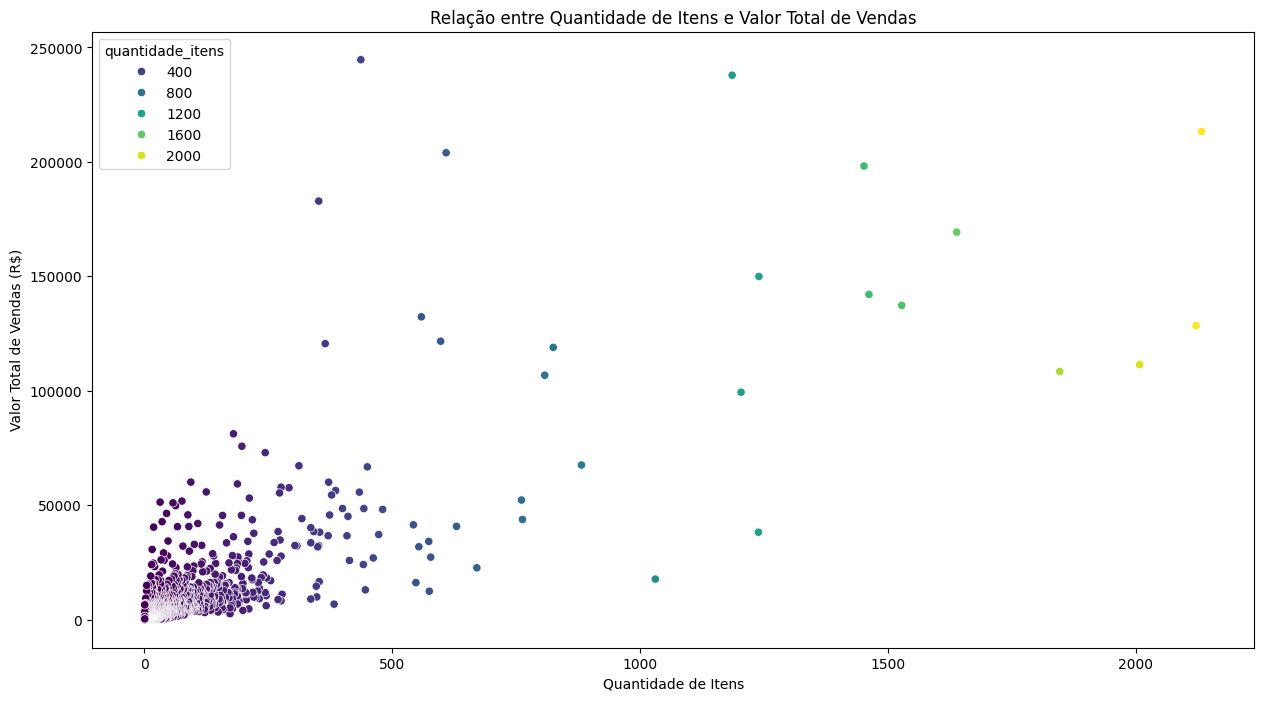

In [25]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_vendedores, x='quantidade_itens', y='valor_total_vendas', hue='quantidade_itens', palette='viridis')
plt.title('Relação entre Quantidade de Itens e Valor Total de Vendas')
plt.xlabel('Quantidade de Itens')
plt.ylabel('Valor Total de Vendas (R$)')

plt.show()

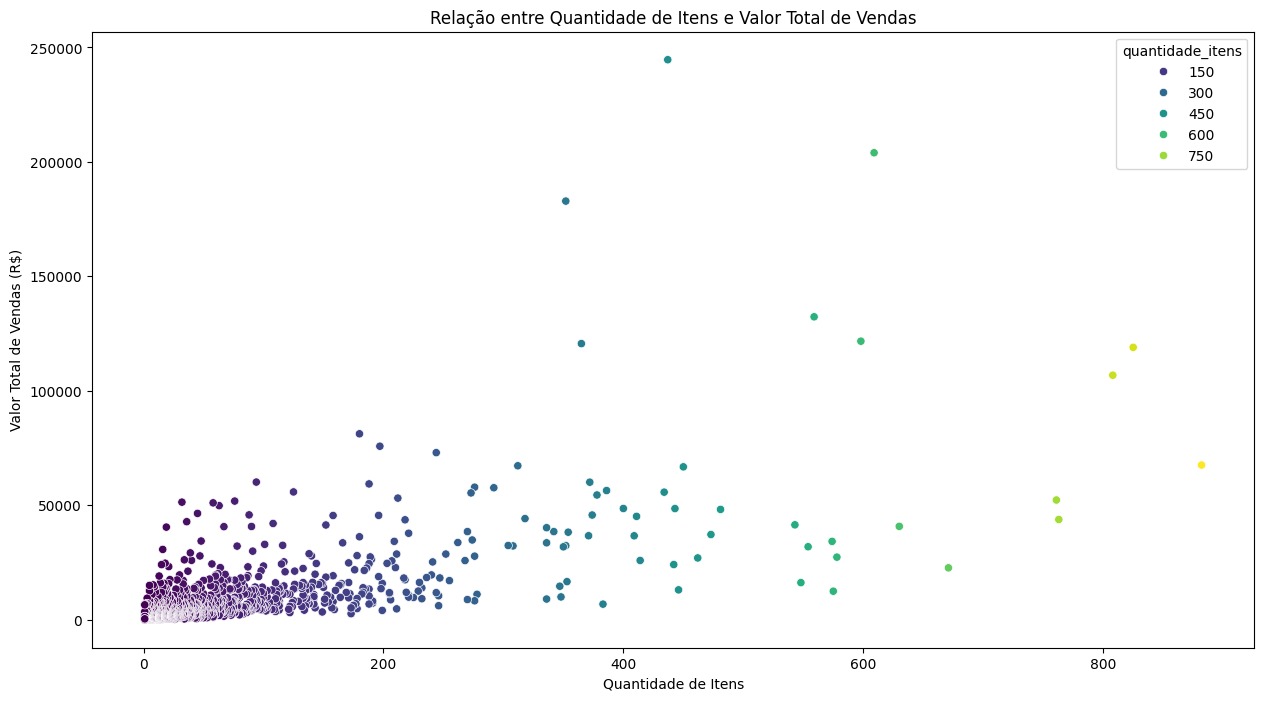

In [26]:
# Limitando as vendas abaixo de mil itens para uma visualização pontual
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_vendedores[(top_vendedores['quantidade_itens']<=1000)], x='quantidade_itens', y='valor_total_vendas', hue='quantidade_itens', palette='viridis')
plt.title('Relação entre Quantidade de Itens e Valor Total de Vendas')
plt.xlabel('Quantidade de Itens')
plt.ylabel('Valor Total de Vendas (R$)')

plt.show()

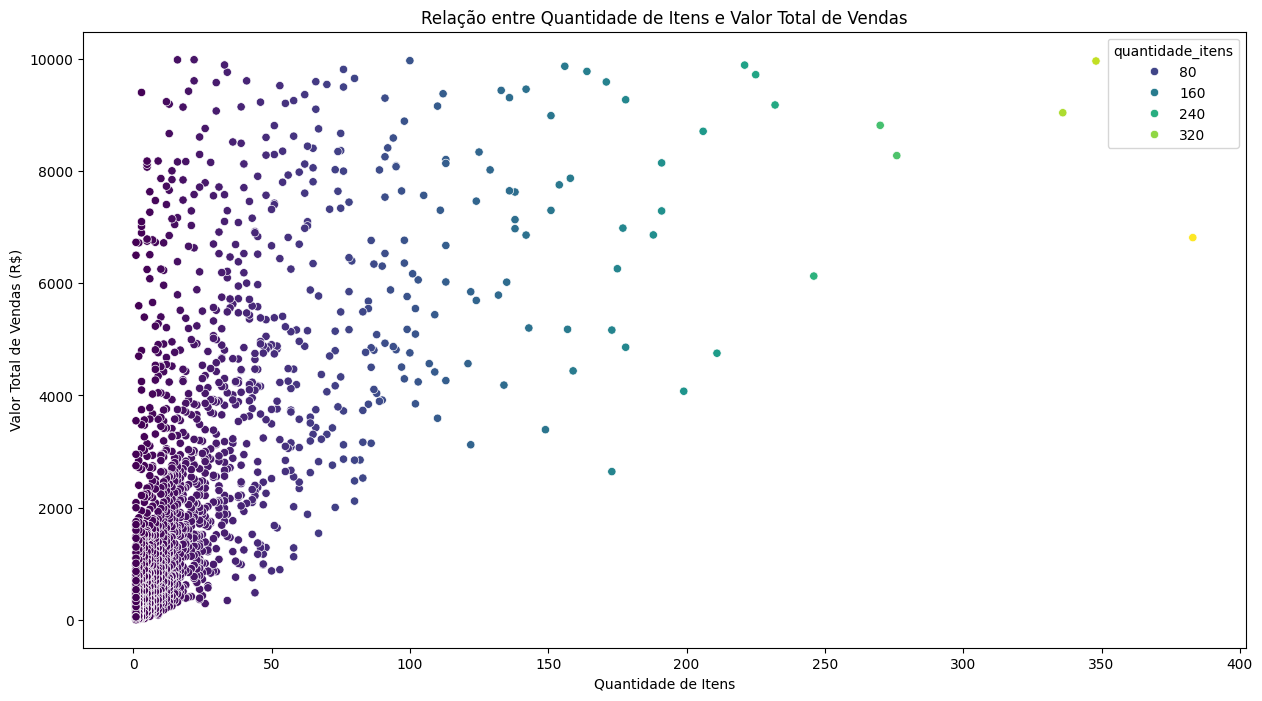

In [27]:
# Limitando as vendas abaixo de mil itens e inferiores a R$ 10 mil para uma visualização pontual
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_vendedores[(top_vendedores['quantidade_itens'] <= 1000) & (top_vendedores['valor_total_vendas'] <= 10000)], x='quantidade_itens', y='valor_total_vendas', hue='quantidade_itens', palette='viridis')
plt.title('Relação entre Quantidade de Itens e Valor Total de Vendas')
plt.xlabel('Quantidade de Itens')
plt.ylabel('Valor Total de Vendas (R$)')

plt.show()

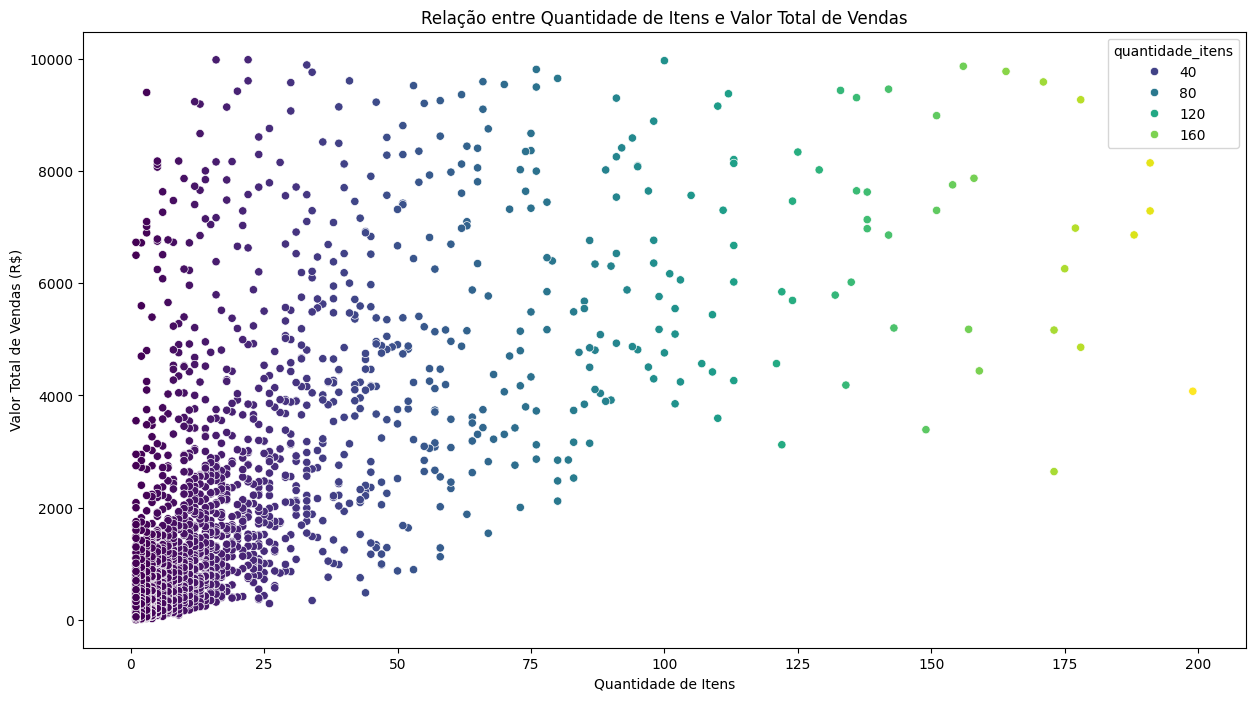

In [28]:
# Limitando as vendas abaixo de 200 itens e inferiores a R$ 10 mil para uma visualização pontual
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_vendedores[(top_vendedores['quantidade_itens'] <= 200) & (top_vendedores['valor_total_vendas'] <= 10000)], x='quantidade_itens', y='valor_total_vendas', hue='quantidade_itens', palette='viridis')
plt.title('Relação entre Quantidade de Itens e Valor Total de Vendas')
plt.xlabel('Quantidade de Itens')
plt.ylabel('Valor Total de Vendas (R$)')

plt.show()

O volume de vendas não possui uma relação direta com o valor total das vendas. Como pode-se observar pelos gráficos acima, há vendedores que venderam pouco e lucraram mais do que outros que venderam mais itens.

---

<blockquote>2. Existe alguma relação entre a localização do vendedor e o valor médio dos pedidos?</blockquote>

In [55]:
preco_local_media = df_olist.groupby('seller_city').agg({'order_id': 'count', 'payment_value':'mean'}).reset_index()
preco_local_media.columns = ['seller_city', 'order_id_count', 'payment_value_mean']
top_localizacao_media = preco_local_media.sort_values('payment_value_mean', ascending=False)
top_localizacao_media.head(10)

,seller_city,order_id_count,payment_value_mean
71,bofete,3,3259.820000
264,ivoti,2,1474.760000
94,california,6,1415.441667
291,lages - sc,3,1197.786667
458,rio verde,18,1181.400000
315,mamanguape,16,1033.583125
318,mandaguari,4,1013.700000
212,guanambi,22,971.446364
490,sao jose dos pinhais,2,941.400000
372,orlandia,6,921.240000


Vamos dar uma olhada no valor total por cidade também.

In [53]:
preco_local = df_olist.groupby('seller_city').agg({'order_id': 'count', 'payment_value':'sum'}).reset_index()
preco_local.columns = ['seller_city', 'order_id_count', 'payment_value']
top_localizacao = preco_local.sort_values('payment_value', ascending=False)
top_localizacao.head(10)

,seller_city,order_id_count,payment_value
517,sao paulo,29157,4253442.43
227,ibitinga,8242,1052674.56
159,curitiba,3134,655714.44
258,itaquaquecetuba,1750,573709.15
220,guarulhos,2438,508846.11
450,rio de janeiro,2529,497372.27
507,sao jose do rio preto,2682,416205.28
442,ribeirao preto,2364,395492.38
325,maringa,2259,380394.46
411,piracicaba,2011,356134.50


Apesar de a cidade com maior volume de vendas também ser a que mais lucra, há uma diferença entre os valores totais e valores médios de pedidos conforme a localizaão do vendedor. Podemos ver que cidades consideradas centros urbanos não estão entre as com maiores valores médios dos pedidos, podendo ser um reflexo da alta competitividade nesses locais. Então, sim, a localização do vendedor tem relação com o valor médio dos pedidos

---

<blockquote>3. Qual a relação entre o valor do pedido e o método de pagamento escolhido?</blockquote>

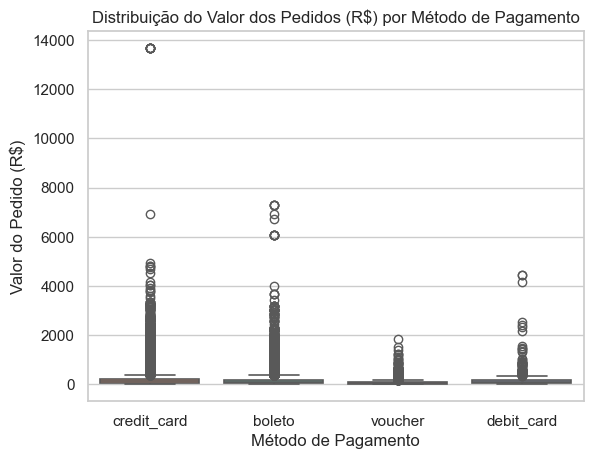

In [54]:
sns.set(style="whitegrid")
# Criando uma coluna fictícia para o exemplo de hue
df_olist['payment_type_category'] = df_olist['payment_type'].astype('category')
ax = sns.boxplot(data=df_olist, x='payment_type', y='payment_value', hue='payment_type_category', palette='Set2', fliersize=6, linewidth=1.2)
plt.title('Distribuição do Valor dos Pedidos (R$) por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Valor do Pedido (R$)')

plt.show()

O Cartão de Crédito é o método de pagamento utilizado com mais frequência, sendo mais utilizado para valores baixos mas também para valores altos.\
O Boleto aprensenta mais dispersão nos dados, indicando que os valores pagos por esse método variam mais.\
O Voucher tem uma distribuição mais concentrada em valores mais baixos e variando menos.\
O Cartão de Débito se assemelha ao Voucher com valores concentrados num patamar mais baixo.\
Há a presença de outliers em todos os métodos de pagamento, especialmente no método de Boleto e Cartão de Crédito. Esses outliers podem representar pedidos com valores muito altos e podem influenciar a interpretação da distribuição geral.

---

<blockquote>4. Quais as categorias de produtos mais vendidas e quais possuem maior margem de lucro?</blockquote>

As categorias que mais lucram.

In [69]:
df_olist['profit_margin'] = df_olist['payment_value'] - df_olist['price']
vendas_categorias = df_olist.groupby('product_category_name').agg({'order_item_id': 'count', 'profit_margin': 'sum'}).reset_index()
vendas_categorias.columns = ['product_category_name','total_sales', 'profit_margin']
top_lucro_categorias = vendas_categorias.sort_values('profit_margin', ascending=False).head(10)
top_lucro_categorias.head(10)

,product_category_name,total_sales,profit_margin
54,moveis_decoracao,8744,665082.50
44,informatica_acessorios,8082,643052.88
13,cama_mesa_banho,11823,620002.65
72,utilidades_domesticas,7355,428171.13
32,esporte_lazer,8945,368131.22
55,moveis_escritorio,1778,360667.53
11,beleza_saude,9972,360017.32
40,ferramentas_jardim,4574,320063.21
8,automotivo,4379,235541.82
66,relogios_presentes,6201,176073.38


As categoias mais vendidas

In [70]:
df_olist['profit_margin'] = df_olist['payment_value'] - df_olist['price']
vendas_categorias = df_olist.groupby('product_category_name').agg({'order_item_id': 'count', 'profit_margin': 'sum'}).reset_index()
vendas_categorias.columns = ['product_category_name','total_sales', 'profit_margin']
top_vendas_categorias = vendas_categorias.sort_values('total_sales', ascending=False).head(10)
top_vendas_categorias.head(10)

,product_category_name,total_sales,profit_margin
13,cama_mesa_banho,11823,620002.65
11,beleza_saude,9972,360017.32
32,esporte_lazer,8945,368131.22
54,moveis_decoracao,8744,665082.50
44,informatica_acessorios,8082,643052.88
72,utilidades_domesticas,7355,428171.13
66,relogios_presentes,6201,176073.38
70,telefonia,4721,147482.89
40,ferramentas_jardim,4574,320063.21
8,automotivo,4379,235541.82


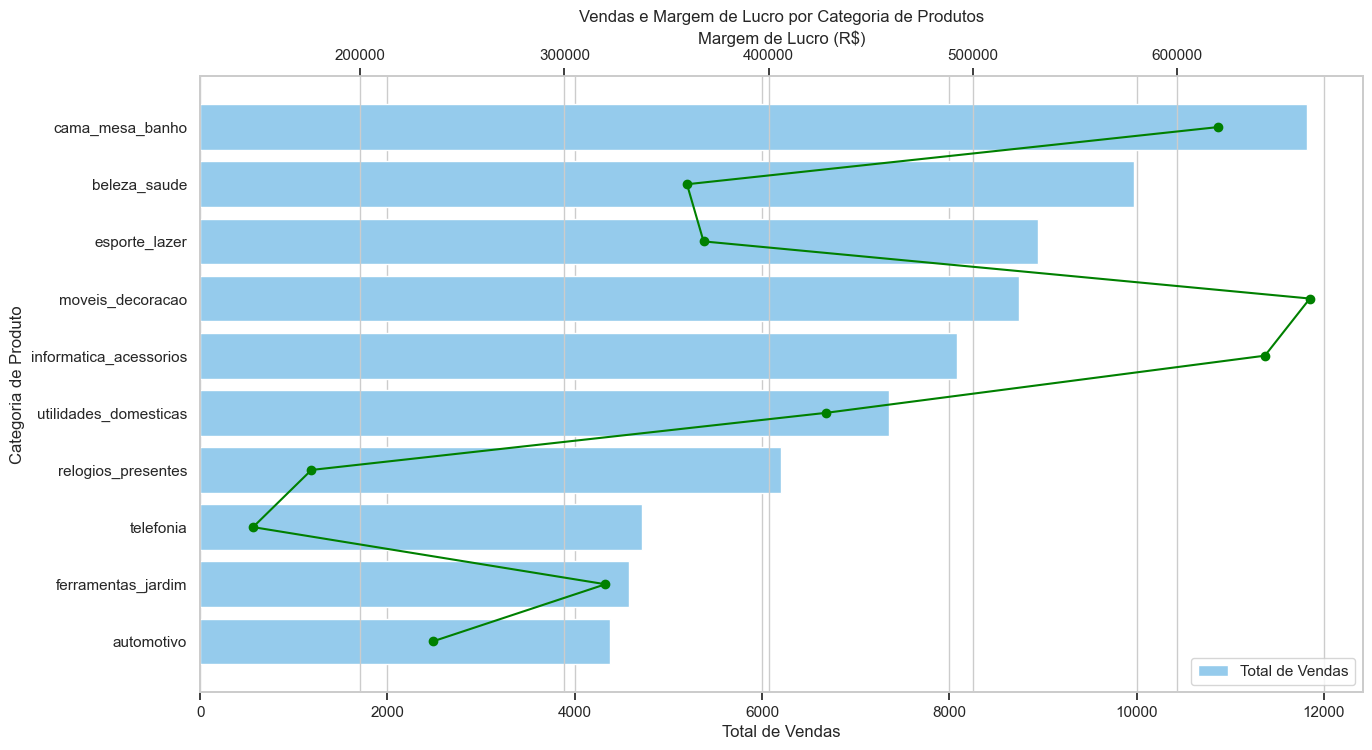

In [78]:
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(data=top_vendas_categorias, x='total_sales', y='product_category_name', ax=ax1, color='lightskyblue', label='Total de Vendas')
ax1.set_xlabel('Total de Vendas')
ax1.set_ylabel('Categoria de Produto')
ax1.set_title('Vendas e Margem de Lucro por Categoria de Produtos')

# Criar um segundo eixo y
ax2 = ax1.twiny()
ax2.plot(top_vendas_categorias['profit_margin'], top_vendas_categorias['product_category_name'], color='green', marker='o', label='Margem de Lucro')
ax2.set_xlabel('Margem de Lucro (R$)')

plt.show()

Como pode-se averiguar pelo gráfico acima, não há relação direta entre maior volume de vendas e lucro. Enquanto Cama, Mesa e Banho e Beleza e Saúde possuem altos volumes de vendas, suas margens de lucro não são tão altas quanto de categorias como Móveis e Decoração e Informática. Com esses dados pode-se identificar quais categorias são mais populares e quais são mais lucrativas, assim como identificar quais poderiam necessitar de uma ação de marketing mais adequada.